# Support Vector Machine
### Jay Bhanushali (60009200047)

In [33]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
from sklearn import datasets, svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Iris dataset

In [34]:
from sklearn.datasets import load_iris

In [35]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### linear, RBF, poly, linearSVC

c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


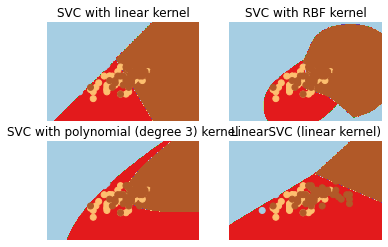

In [37]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 100  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']


plt.set_cmap(plt.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.set_cmap(plt.cm.Paired)
    plt.contourf(xx, yy, Z)
    plt.axis('off')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y)

    plt.title(titles[i])

plt.show()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
#Iris dataset classification with SVC
lsvc = LinearSVC(  C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)

lsvc.fit(X_train, y_train)

y_test_pred = lsvc.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_test_pred)*100,2))

Accuracy: 77.78


c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [41]:
print(classification_report(Y, lsvc.predict(X), target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.74      0.56      0.64        50
           2       0.67      0.82      0.74        50

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.78       150
weighted avg       0.79      0.79      0.78       150



In [42]:
LSVC = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)

#evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LSVC, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report
print('Accuracy on Linear SVM: %.3f, with std: %.3f' % (np.mean(n_scores), np.std(n_scores)))

Accuracy on Linear SVM: 0.796, with std: 0.125


## Orange and Apple

In [43]:
df = pd.read_csv('apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [44]:
df.Class.replace(to_replace ="orange",value = -1, inplace=True)
df.Class.replace(to_replace ="apple",value = 1, inplace=True)

In [54]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [55]:
svc = svm.SVC(kernel = "linear", C=1.0).fit(X_train,y_train)
y_pred = [] # 0: train, 1: test
y_pred.append(svc.predict(X_train))
y_pred.append(svc.predict(X_test))

In [56]:
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 100.0 %
Test  Acc: 100.0 %


c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


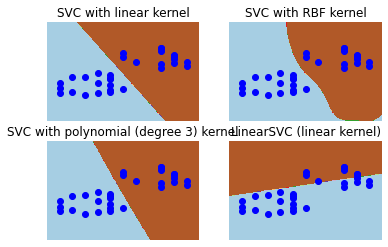

In [57]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 100  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']


plt.set_cmap(plt.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.set_cmap(plt.cm.Paired)
    plt.contourf(xx, yy, Z)
    plt.axis('off')

    # Plot also the training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='b')

    plt.title(titles[i])

plt.show()

Performance of linear SVC

In [58]:
y_pred = [] # 0: train, 1: test
y_pred.append(lin_svc.predict(X_train))
y_pred.append(lin_svc.predict(X_test))
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 81.25 %
Test  Acc: 87.5 %


Performance of RBF SVC

In [59]:
y_pred = [] # 0: train, 1: test
y_pred.append(rbf_svc.predict(X_train))
y_pred.append(rbf_svc.predict(X_test))
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 100.0 %
Test  Acc: 100.0 %


In [60]:
import time

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
hyp_par = { 'C':np.arange(2,10,2),
            'gamma':np.arange(0.1,1,0.2)}

start = time.time()
lin_svc = svm.SVC(kernel="linear")
clf = RandomizedSearchCV(lin_svc,hyp_par)
search = clf.fit(X_train, y_train)
lin = clf.best_params_
end = time.time()
print(clf.best_params_)
print('Time required = ',end-start,'s')

{'gamma': 0.7000000000000001, 'C': 8}
Time required =  0.5618057250976562 s


In [93]:
hyp_par = { 'C':np.arange(1,100) }

start = time.time()
lin_svc = svm.LinearSVC(dual = False)
clf = RandomizedSearchCV(lin_svc,hyp_par)
search = clf.fit(X_train, y_train)
lin = clf.best_params_
end = time.time()
print(clf.best_params_)
print('Time required = ',end-start,'s')

{'C': 45}
Time required =  0.47565579414367676 s


In [94]:
improved_rbf = svm.SVC(kernel="rbf",C=6, gamma = 0.1).fit(X_train,y_train)
y_pred = [] # 0: train, 1: test
y_pred.append(improved_rbf.predict(X_train))
y_pred.append(improved_rbf.predict(X_test))
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 100.0 %
Test  Acc: 100.0 %


In [100]:
improved_lin_svc = svm.LinearSVC(C=45).fit(X_train,y_train)
y_pred = [] # 0: train, 1: test
y_pred.append(improved_lin_svc.predict(X_train))
y_pred.append(improved_lin_svc.predict(X_test))
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 84.38 %
Test  Acc: 87.5 %


c:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [97]:
improved_lin_svc = svm.SVC(kernel="rbf",C=8, gamma = 0.7).fit(X_train,y_train)
y_pred = [] # 0: train, 1: test
y_pred.append(improved_lin_svc.predict(X_train))
y_pred.append(improved_lin_svc.predict(X_test))
print(f"Train Acc: {round(accuracy_score(y_train, y_pred[0])*100,2)} %")
print(f"Test  Acc: {round(accuracy_score(y_test, y_pred[1])*100,2)} %")

Train Acc: 100.0 %
Test  Acc: 100.0 %


Training accuracy of LinearSVM imporved from 81.25% to 84.34%, testing accuracy remains the same (87.5%)

Accuracy of RBF was 100% before RandomizedSearchCV and it remained 100%